In [123]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

### Question 1

In [10]:
def UserSim(n, lmbda):
    """
    Input: 
    - n: number of users to stimulate
    - lmbda: parameter
    
    Output: 
    - list of exponential random variable simulations (not array)
    """
    return list(np.random.exponential(scale=1/lmbda, size=n))

1a) Create a funnel visualization with 1,000 users and a   parameter of 2 with stops every .25 to 3. 

Remember that a funnel simulation is not a histogram – it is a **plot of the number of users who survive beyond the time hurdle**. So, if your chart shows the number 775 when the x-axis is at .5, that means that 775 of the 1,000 simulated users had a survival time beyond .5 seconds.

In [91]:
def plot_funnel(stoptimes, start, end, inv, title):
    stoptimes = np.array(stoptimes)
    bins = np.arange(start, end+inv, inv)
    funnel_bins = [len(stoptimes[stoptimes >= edge]) for edge in bins]
    
    plt.bar(bins, funnel_bins, width=.2)
    plt.xlabel('The number of users who survive')
    plt.ylabel('Stop time')
    plt.title(title)

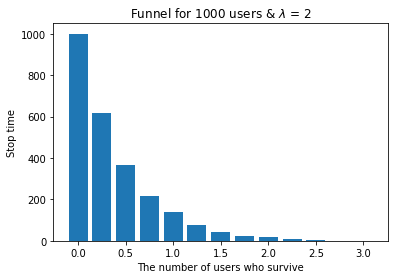

In [92]:
np.random.seed(42)
stoptimes = UserSim(n = 1000, lmbda = 2)
start, end, inv = 0.0, 3.0, .25
plot_funnel(stoptimes, start, end, inv, title="Funnel for 1000 users & $\lambda$ = 2")
plt.figure(figsize=(7, 4))
plt.show()

1b) Repeat the previous assignment, but with stops equal to the values of .2 to 3.0 in step sizes of .2, making sure to plot each.

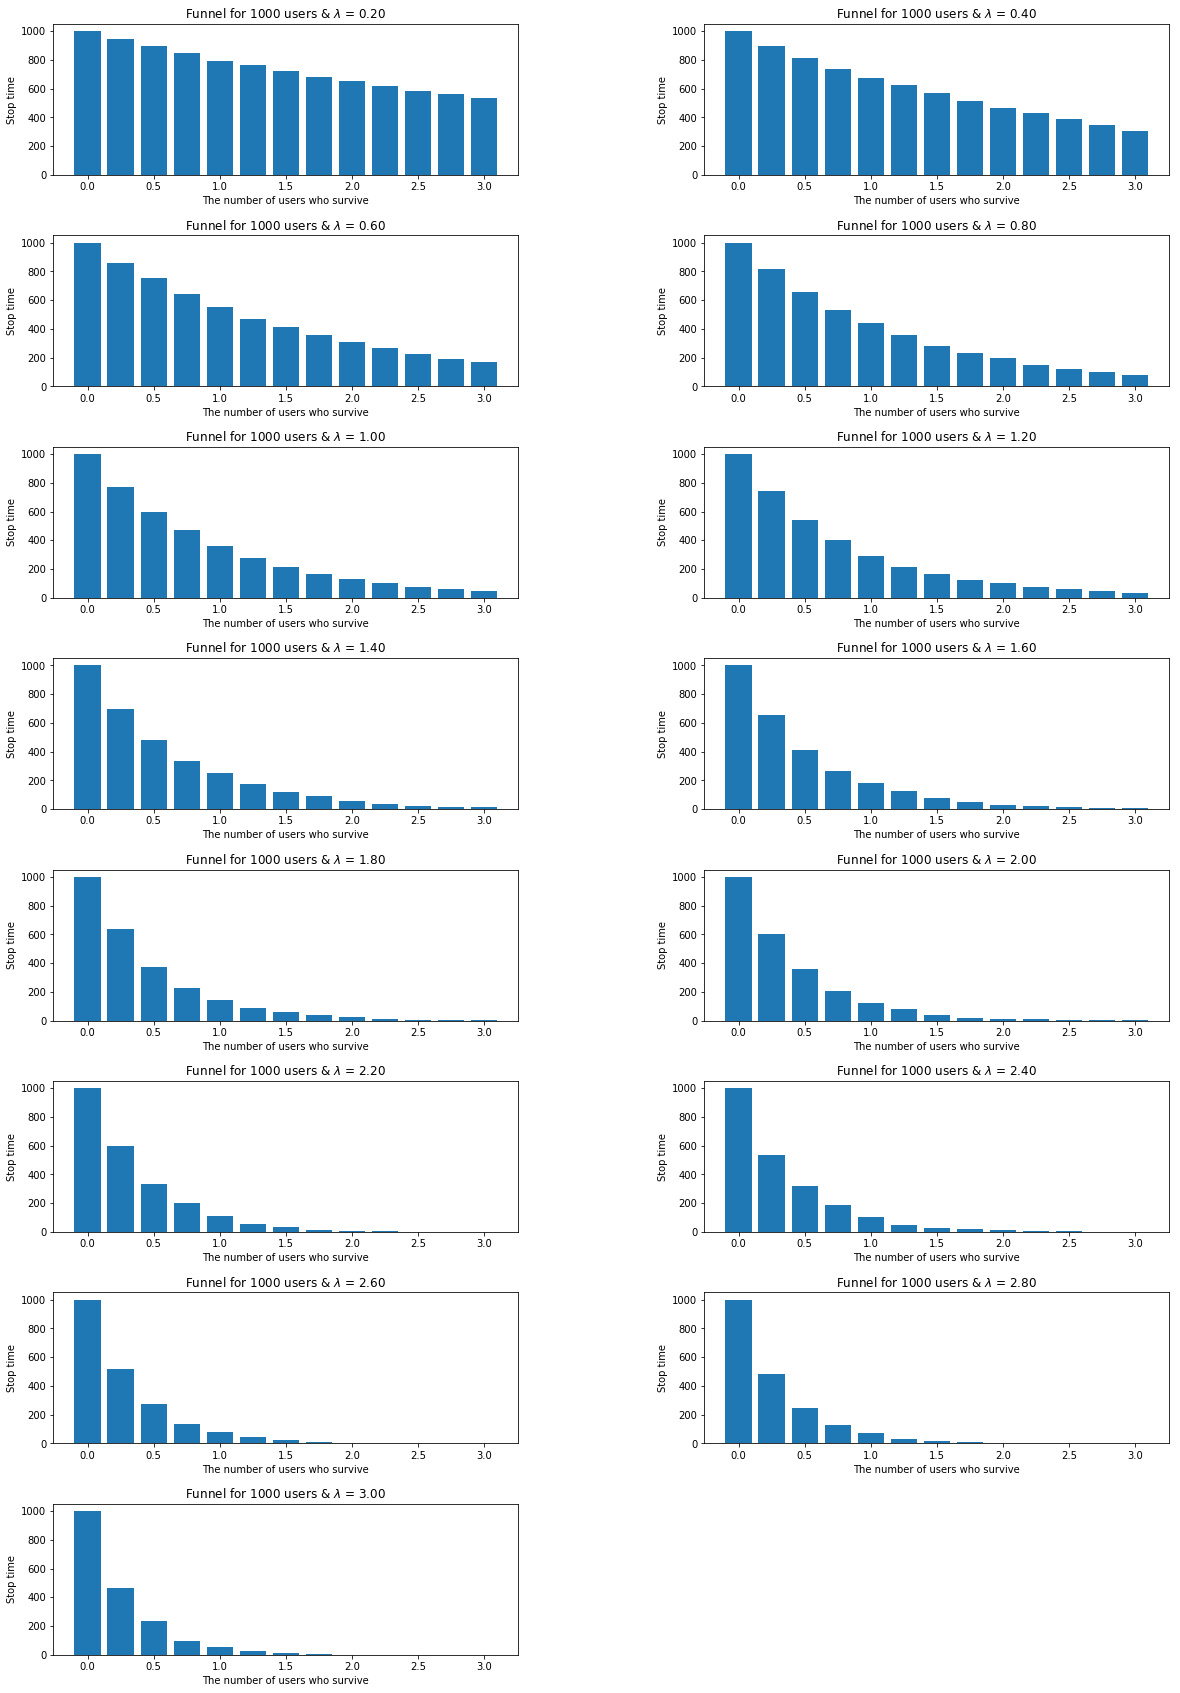

In [111]:
np.random.seed(42)
lambda_range = np.arange(0.2, 3.2, .2)
plt.figure(figsize=(20,30))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
for i, lmbda in enumerate(lambda_range): 
    stoptimes = UserSim(n = 1000, lmbda = lmbda)
    start, end, inv = 0.0, 3.0, .25
    plt.subplot(np.ceil(len(lambda_range)/2), 2, i+1)
    plot_funnel(stoptimes, start, end, inv, title="Funnel for 1000 users & $\lambda$ = %.2f" % lmbda)

1c) the relationship between lambda and survival times  -- Define a survival times

ANSWER

### Question 2 - Estimate Lambda

MLE for Lambda : $$\lambda = \frac{1}{\bar x}$$

In [102]:
def EstLam1(user_lst):
    """
    Return the MLE of lambda using user list
    """
    x_avg = np.array(user_lst).mean()
    est_lambda = 1/x_avg
    return est_lambda

2a) EstLam1 is an unbiased estimator. What does this mean?

ANSWER

2b) Generate a sample of 1,000 users using UserSim with lambda equal to 1 and estimate using EstLam1.

In [118]:
# ANSWER
np.random.seed(42)
stoptimes = UserSim(n = 1000, lmbda = 1)
est_lambda = EstLam1(stoptimes)
print("Question 2b")
print("Estimated Lambda is: %.4f" % est_lambda)

Question 2b
Estimated Lambda is: 1.0283


2c) Using that **same sample** of 1,000 users, bootstrap a 95% confidence interval for the lambda estimate (use **500 bootstraps**).

In [137]:
def lambdaCI(stoptimes, n_bootstraps=500, alpha=0.95):
    """
    Input: 
    - stoptimes: list of users' stoptimes 
    - n_bootstraps: number of bootstraps
    - alpha: 1 - confidence level
    
    Output: (1-alpha/2), alpha/2 percentile of bootstrap
    """
    # boostraps
    est_lambdas = []
    num_users = len(stoptimes)
    
    # boostrap from the given user quit times
    for i in range(n_bootstraps):
        new_stoptimes = np.random.choice(stoptimes, num_users)
        new_est_lambda = EstLam1(new_stoptimes)
        est_lambdas.append(new_est_lambda)
    
    # compute confidence interval for the boostrapped lambda estimates
    est_lambdas = np.asarray(est_lambdas)
    upper_p, lower_p = (1 - (alpha / 2)) * 100, (alpha / 2) * 100
    upper = np.percentile(est_lambdas, upper_p)
    lower = np.percentile(est_lambdas, lower_p)
    
    return (lower, upper)

In [120]:
# Using that same sample of 1,000 users, bootstrap a 95% confidence interval for the lambda estimate (use 500 bootstraps).
lower_bound, upper_bound = lambdaCI(stoptimes, n_bootstraps=500, alpha=0.95)
lower_bound, upper_bound

(1.0276017977177572, 1.032314083482182)

2d) Repeat the above process with **number of users** equal to 100, 200, 500, 1,000, 2,000, 5,000 and 10,000. Create both a **table** and a **visualization** which includes both the **estimated lambda** and the confidence intervals. How do the results change as the number of users increase? -- DECREASING!

In [136]:
users_range = [100, 200, 500, 1000, 2000, 5000, 10000]
lambdaCI_df = pd.DataFrame({
    'num_users': users_range,
    'lambda': np.ones(len(users_range),)
})
lambdaCI_df

,lambda,num_users
0,1.0,100
1,1.0,200
2,1.0,500
3,1.0,1000
4,1.0,2000
5,1.0,5000
6,1.0,10000


In [138]:
np.random.seed(42)
lambdaCI_df['estimated_lambda'] = lambdaCI_df['num_users'].apply(lambda x: EstLam1(UserSim(x, lmbda = 1)))
lambdaCI_df['lower_bound'], lambdaCI_df['upper_bound'] = zip(*lambdaCI_df['num_users'].apply(lambda x: 
                                                                 lambdaCI(UserSim(x, lmbda = 1), 500, 0.95)))

In [140]:
lambdaCI_df['CI_range'] = lambdaCI_df['upper_bound'] - lambdaCI_df['lower_bound']
lambdaCI_df

,lambda,num_users,estimated_lambda,lower_bound,upper_bound,CI_range
0,1.0,100,1.093197,0.912598,0.923047,0.010449
1,1.0,200,0.998189,0.897217,0.905963,0.008747
2,1.0,500,0.989222,0.952230,0.959170,0.006940
3,1.0,1000,0.990830,0.989286,0.993102,0.003816
4,1.0,2000,1.013024,1.052157,1.055470,0.003313
5,1.0,5000,1.034332,0.998479,1.000783,0.002304
6,1.0,10000,0.992048,1.013742,1.015100,0.001358


Text(0,0.5,'95% CI Range')

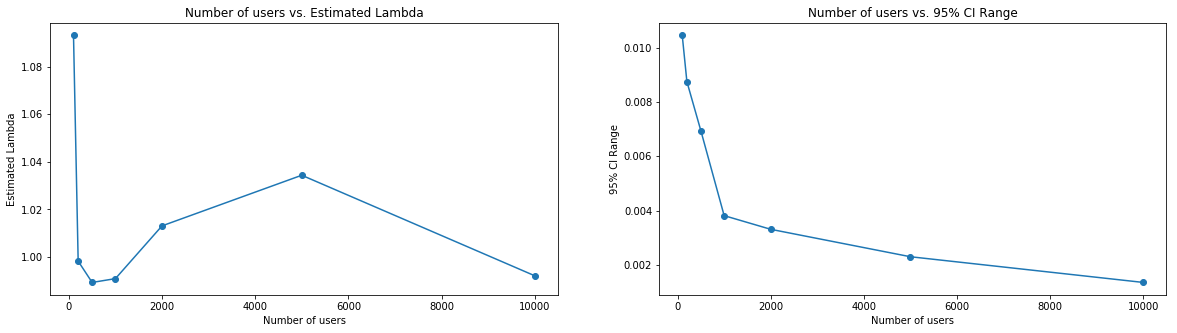

In [160]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(lambdaCI_df['num_users'], lambdaCI_df['estimated_lambda'], marker='o')
plt.title("Number of users vs. Estimated Lambda")
plt.xlabel("Number of users")
plt.ylabel("Estimated Lambda")

plt.subplot(1,2,2)
plt.plot(lambdaCI_df['num_users'], lambdaCI_df['CI_range'], marker='o')
plt.title("Number of users vs. 95% CI Range")
plt.xlabel("Number of users")
plt.ylabel("95% CI Range")

### Question 3

In [4]:
def HurdleFun(user_list, breakpoints):
    """
    Input: 
    - List from UserSim of times that users quit (user quit times)
    - List of breakpoints (of arbitrary length)
    Output:
    - List of the number of users who fail to proceed beyond that break-point, 
      but did get to the previous break-point.
    """

(a) Carefully explain why equation 2.1 will not work using event data.

(b) Take the log of equation 2.2 and, using the distribution function, simplify it by turning it into sums and removing unnecessary expressions.

### Question 4

In [5]:
def EstLam2(hurdle_list, breakpoints):
    """
    Input: 
    - Hurdle output list
    - List of breakpoints, which is the same input of HurdleFun
    
    Output: 
    - A python lambda function which takes, as its sole input, a lambda value 
    and which will return the log likelihood value for the data originally entered in HurdleFun. 
    """

In [6]:
def MaxMLE():
    """
    Input: 
    - range of lambda values
    
    Output: 
    - the lambda that maximizes the likelihood
    
    Example: 
    MaxMLE( HurdleFun(x, breaks), breaks, list(numpy.arange(.1, 3, .05)))
    """

4a) Using the functions defined above, run 1,000 simulations of 100 users with the following sets of break points:
- [.25,.75]
- [.25,3]
- [.25,10]

For each simulation calculate the difference between the estimated lambda using EstLam1 and EstLam2: 
- What is the average difference? 
- How does moving the second breakpoint affect the estimate?

In [ ]:
# ANSWER

ANSWER

4b) Using what you learned from doing the above, how should you design breakpoints? What trends can you identify from the above data. Feel free to run additional simulations to identify other trends.

ANSWER